# Saving To VMEC-Formatted Output

In [1]:
%matplotlib inline
from desc.equilibrium import EquilibriaFamily
from desc.plotting import plot_surfaces,plot_section # used to visualize the DESC results
from desc.vmec import VMECIO # needed to save equilibrium objects as VMEC-formatted .nc files
import netCDF4 # needed for VMECIO

C:\Users\socce\Desktop\Research\Equilibrium\desc_vmec_coords\DESC\desc\backend.py:48: UserWarning: Failed to load JAX
  warnings.warn(colored("Failed to load JAX", "red"))


DESC version 0.4.3+11.g2125d27.dirty, using NumPy backend, version=1.20.2, dtype=float64
Using device: CPU, with 16.64 GB available memory


In this notebook, we have just ran `python -m desc examples/DESC/DSHAPE` in the main DESC directory, so we now have the DESC results file `examples/DESC/DSHAPE_output.h5`. 
Now we load in the solved equilibrium. The results are stored in an `EquilibriaFamily` object, which is basically a list of equilibria from the first initial guess up until the final solved equilibrium. We will just extract the final solved equilibrium using the `[-1]` (The `EquilibriaFamily` object can be indexed like a list).

In [2]:
eq = EquilibriaFamily.load(load_from='../../examples/DESC/DSHAPE_output.h5')[-1] # the ../.. are just because this notebook is located in DESC/docs/notebooks

We can look at the final flux surfaces using the `plot_surfaces` function, and the final normalized force error with the `plot_section` function, both from `desc.plotting`:

(<Figure size 564x705 with 1 Axes>,
 array([<AxesSubplot:title={'center':'$\\zeta \\cdot NFP/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

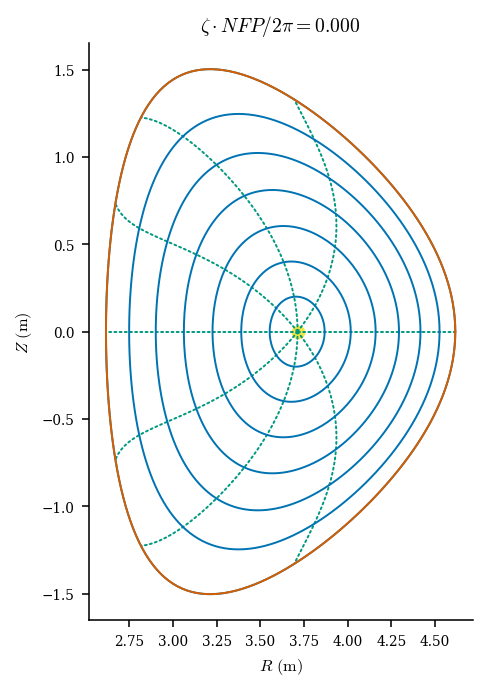

In [3]:
plot_surfaces(eq)

(<Figure size 705x705 with 2 Axes>,
 array([<AxesSubplot:title={'center':'|F| / |$|\\nabla(p)|~$| $\\zeta \\cdot NFP/2\\pi = 0.000$ '}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

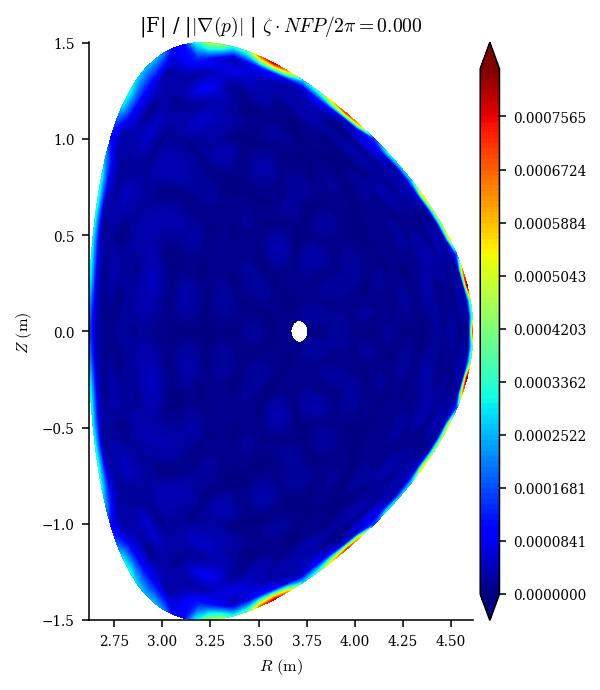

In [4]:
plot_section(eq,name='|F|',norm_F=True) # we want to plot the magnitude of the force error |F|, and we want it shown normalized by the pressure gradient

To save the equilibrium in a VMEC-formatted `.nc` file, we use the `VMECIO` class we imported from `desc.vmec`. This class will convert the quantities defining the equilibrium from DESC coordinates to VMEC equivalents.

In [5]:
VMECIO.save(eq,'../../examples/DESC/DSHAPE_output.nc')

We now have a file `DSHAPE_output.nc` which is the equivalent Equilibrium solution in the VMEC coordinates and data format. We can now treat it as any other VMEC .nc file. For example, we can use our VMEC comparison tools to compare the two files now, such as comparing the flux surfaces using `VMECIO.plot_vmec_comparison` (which unsurprisingly are the same):

(<Figure size 846x846 with 1 Axes>,
 array([<AxesSubplot:xlabel='R', ylabel='Z'>], dtype=object))

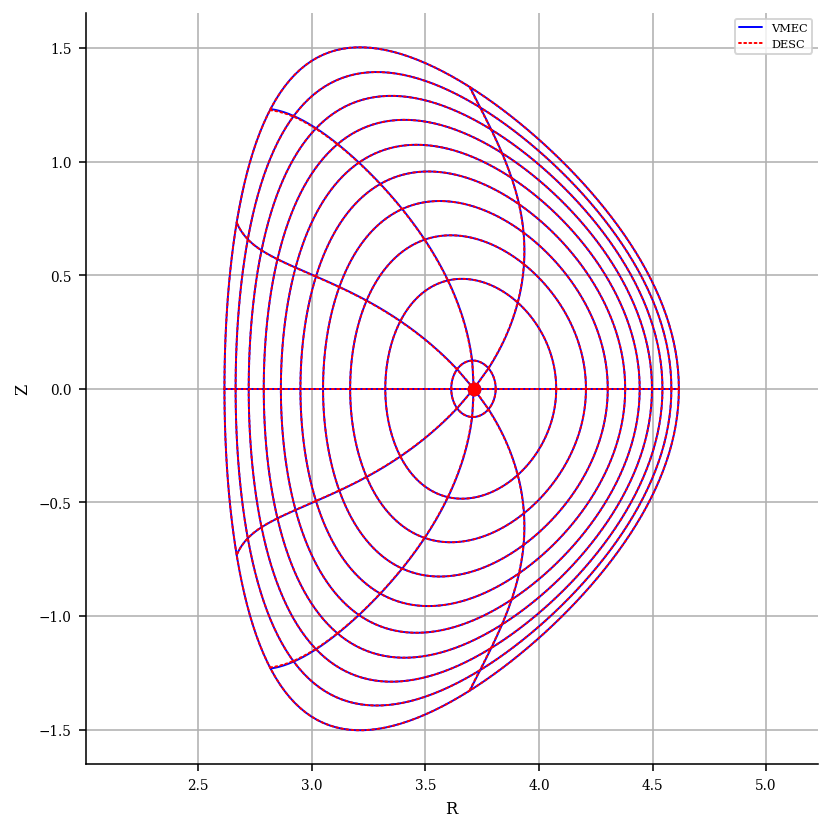

In [6]:
vmec_formatted_eq_file = '../../examples/DESC/DSHAPE_output.nc'
VMECIO.plot_vmec_comparison(eq,vmec_formatted_eq_file)